# `PrmsDiscretization` and `PrmsPlot`

In this notebook we give a quick rundown of how to import a discretization for a PRMS model and how to plot figures using this discretization.



In [1]:
import os
from gsflow import GsflowModel
from gsflow.output import PrmsDiscretization, PrmsPlot
import matplotlib.pyplot as plt
import numpy as np
import os

To start this tutorial, let's load the Sagehen model to work with

In [2]:
workspace = os.path.join(".", "data", "sagehen", "gsflow")
control = "saghen_new_cont.control"

gs = GsflowModel.load_from_file(os.path.join(workspace, control))

Control file is loaded
Working on loading PRMS model ...
Prms model loading ...
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_0.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_1.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_2.params
------------------------------------
------------------------------------
Reading parameter file : C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\sagehen\gsflow\saghen_new_par_3.params
------------------------------------
PRMS model loaded ...
Working on loading MODFLOW files ....
   loading iuzfbnd array...
   loading irunbnd array...
   loading vks a

## Loading discretization from flopy

We can load our discretization from the Modflow model if the hru's in PRMS correspond to the modflow grid cells

We can also plot the discretization from the `PrmsDiscretization` object

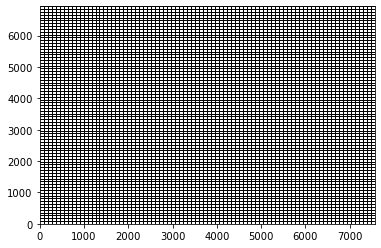

In [3]:
mf = gs.mf
prms_dis = PrmsDiscretization.load_from_flopy(mf)
prms_dis.plot_discretization();

## Load discretization from a shapefile

We can also load the hru discretization from a shapefile. This is import, because HRU shapes and sizes do not have to correspond to the modflow grid

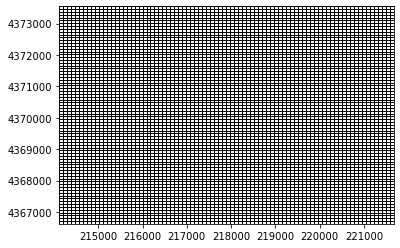

In [4]:
workspace = os.path.join(".", "data", "sagehen", "shapefiles")
shp = "hru_params.shp"

prms_dis = PrmsDiscretization.load_from_shapefile(os.path.join(workspace, shp))
prms_dis.plot_discretization();

## Using `PrmsPlot` with the `PrmsDiscretization` object

`PrmsPlot` can be instatiated easily by passing it a `PrmsDiscetizaiton` object

We can use this to plot parameters from the parameter file, contour parameters, plot arrays of data, and contour arrays of data

In [5]:
# remember, prms_dis was loaded from our shapefile
plot = PrmsPlot(prms_dis)
PrmsPlot

gsflow.output.prms_plot.PrmsPlot

## Plotting parameters

the plotting functions use matplotlib and accept matplotlib keyword arguments. In addition a `masked_value` argument can be supplied to mask out certain values

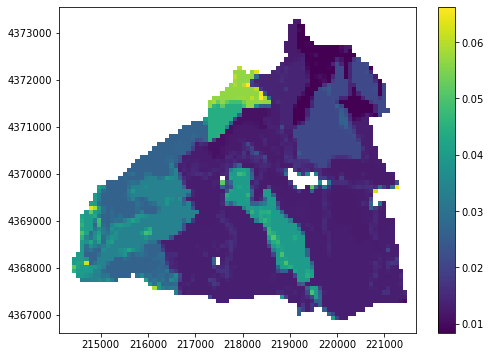

In [6]:
plot = PrmsPlot(prms_dis)

fig = plt.figure(figsize=(8, 6))

# let's grab a parameter to plot
ssr2gw = gs.prms.parameters.get_record("ssr2gw_rate")

# mask out 0 value and set the colormap to viridis
ax = plot.plot_parameter(ssr2gw, masked_values=[0], cmap="viridis")
plt.colorbar(ax);

### If a parameter has a dimension of nhru*12 we can plot that too:

let's use `rain_adj` as an example, we automatically add the colorbar for these parameters so there is no need for the user to

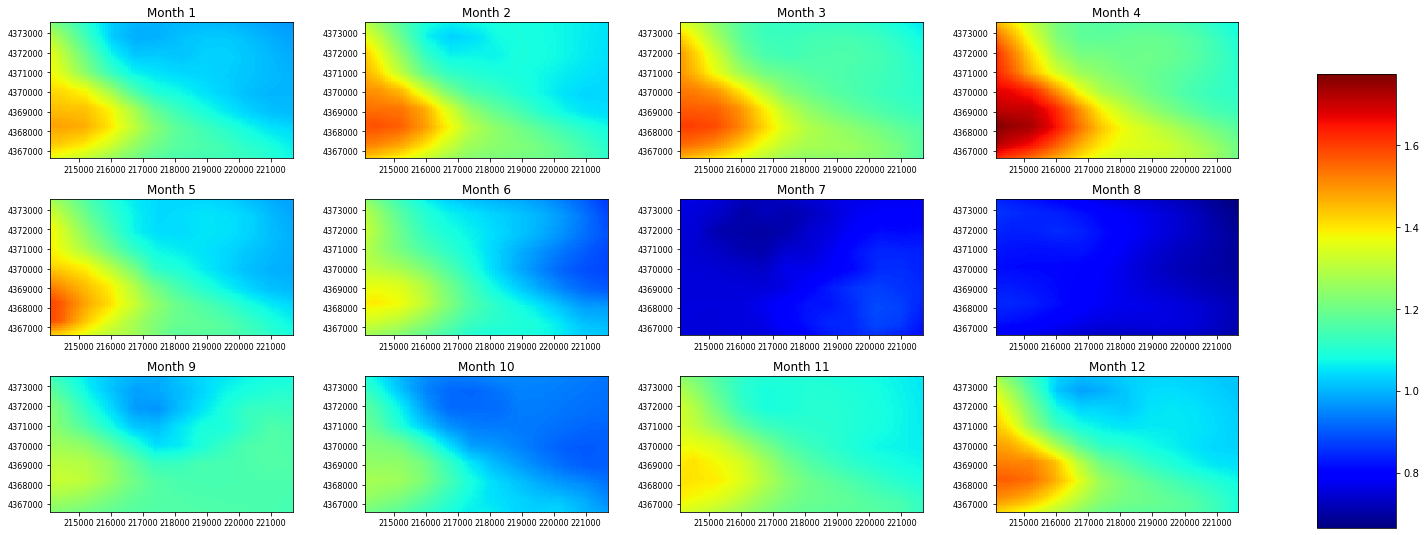

In [7]:
rain_adj = gs.prms.parameters.get_record("rain_adj")

# mask out 0 value and set the colormap to viridis
ax = plot.plot_parameter(rain_adj, masked_values=[0], cmap="jet")

## Contouring a parameter

contouring a parameter is very easy using the `contour_parameter()` method. This method also accepts matplotlib keyword arguments for contouring and has a `masked_values` argument

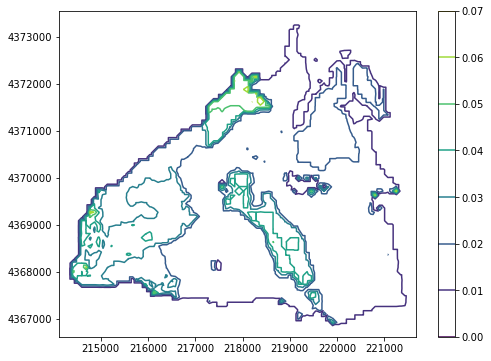

In [8]:
plot = PrmsPlot(prms_dis)

fig = plt.figure(figsize=(8, 6))

# let's grab a parameter to plot
ssr2gw = gs.prms.parameters.get_record("ssr2gw_rate")

# set the colormap to viridis
ax = plot.contour_parameter(ssr2gw, cmap="viridis")
plt.colorbar(ax);

### If a parameter has a dimension of nhru*12 we can contour that too:

let's use `rain_adj` as an example, we automatically add a scale for these parameters so there is no need for the user to

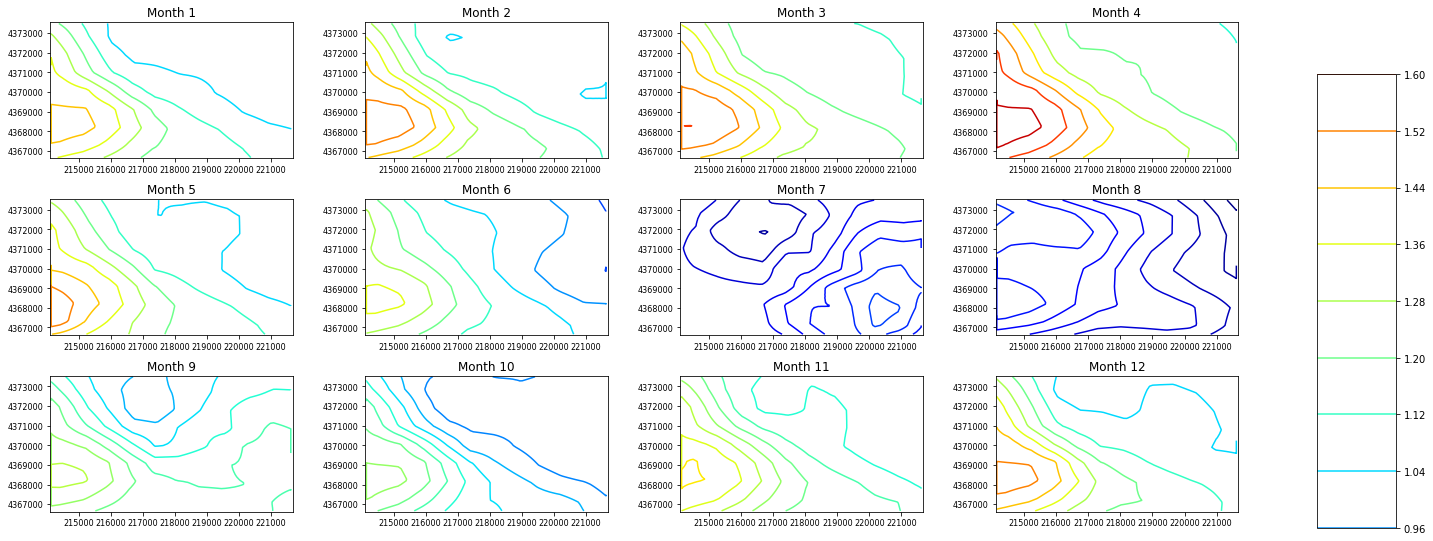

In [9]:
rain_adj = gs.prms.parameters.get_record("rain_adj")

# mask out 0 value and set the colormap to viridis
ax = plot.contour_parameter(rain_adj, masked_values=[0], cmap="jet")

## Plotting and Contouring external data

`PrmsPlot` supports plotting and contouring external data with the `plot_array` and `contour_array` method. 

Of note: the array of data must be the same size as `nhru`

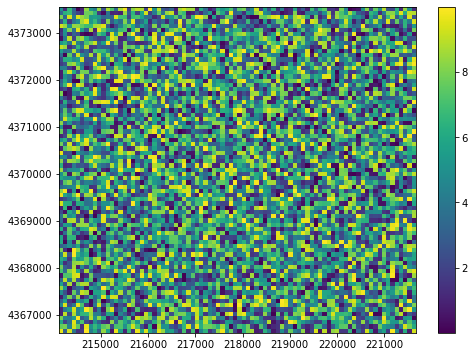

In [10]:
array = np.random.rand(prms_dis.nhru) * 10

fig = plt.figure(figsize=(8, 6))
plot = PrmsPlot(prms_dis)
ax = plot.plot_array(array)
plt.colorbar(ax);

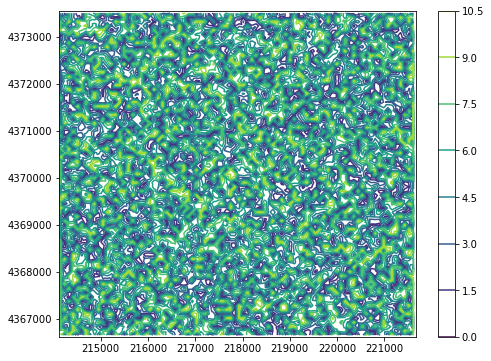

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = plot.contour_array(array)
plt.colorbar(ax);

# The `PrmsPlot` class is compatible with flopy

Plotting using `PrmsPlot` can be layered with flopy's `PlotMapView` to create gsflow plots!

Let's look at a basic example

In [12]:
import flopy as fp
from flopy.plot import PlotMapView

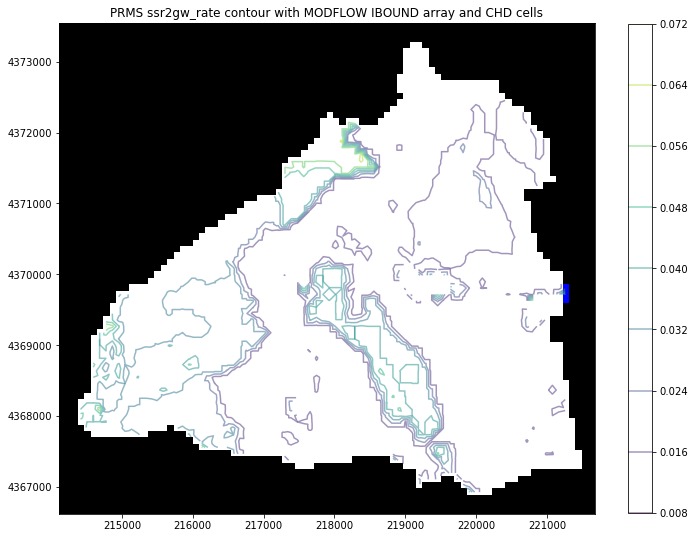

In [13]:
fig = plt.figure(figsize=(12, 12))

                 
# get the gsflow modflow object and pass it to flopy's ModelMap
ml = gs.mf
ml.modelgrid.set_coord_info(xoff=prms_dis.extent[0], yoff=prms_dis.extent[2])
m_map = PlotMapView(model=ml)
m_map.plot_ibound()
# get the current working matplotlib axes object
flopy_ax = plt.gca()

# let's grab a prms parameter to plot
ssr2gw = gs.prms.parameters.get_record("ssr2gw_rate")
plot = PrmsPlot(prms_dis)
# let's pass the flopy_ax to contour_parameter()
ax = plot.contour_parameter(ssr2gw, ax=flopy_ax, masked_values=[0], cmap="viridis", alpha=0.5)
plt.title("PRMS ssr2gw_rate contour with MODFLOW IBOUND array and CHD cells")
plt.colorbar(ax, shrink=0.75);